Practical 6: Decision Tree with EDA

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("titanic.csv")

In [ ]:
df.head(4)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

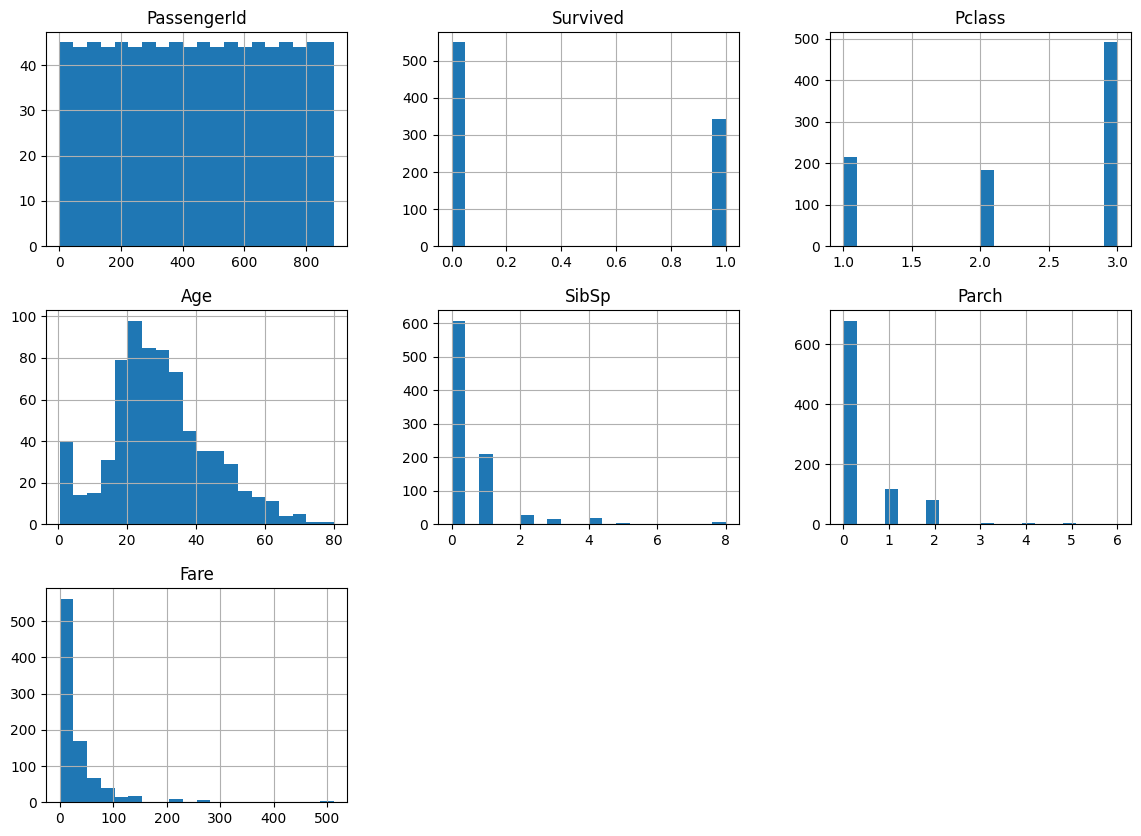

In [ ]:
df.hist(bins = 20, figsize = (14,10))
import matplotlib.pyplot as plt
plt.show()

In [ ]:
!pip install seaborn


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
df.drop(["Name"], axis = 1, inplace = True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
df["Sex"] = lb.fit_transform(df["Sex"])

In [ ]:
df["Cabin"] = lb.fit_transform(df["Cabin"])
df["Embarked"] = lb.fit_transform(df["Embarked"])
df["Ticket"] = lb.fit_transform(df["Ticket"])

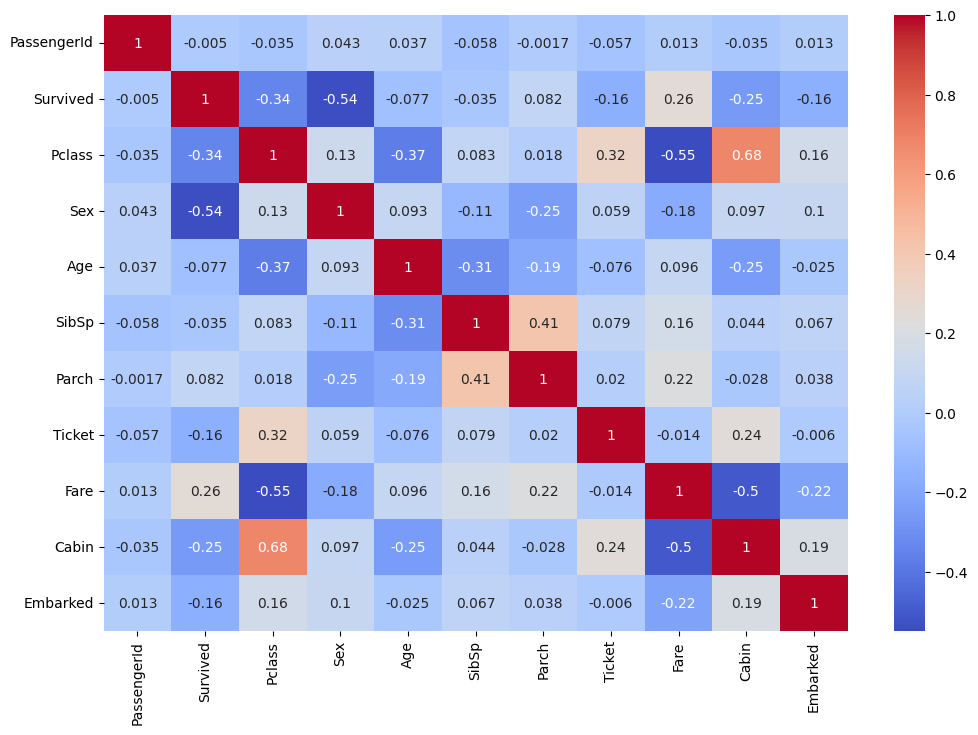

In [ ]:
corr_matrix = df.corr()
plt.figure(figsize = (12,8))

import seaborn as sns
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')
plt.show()

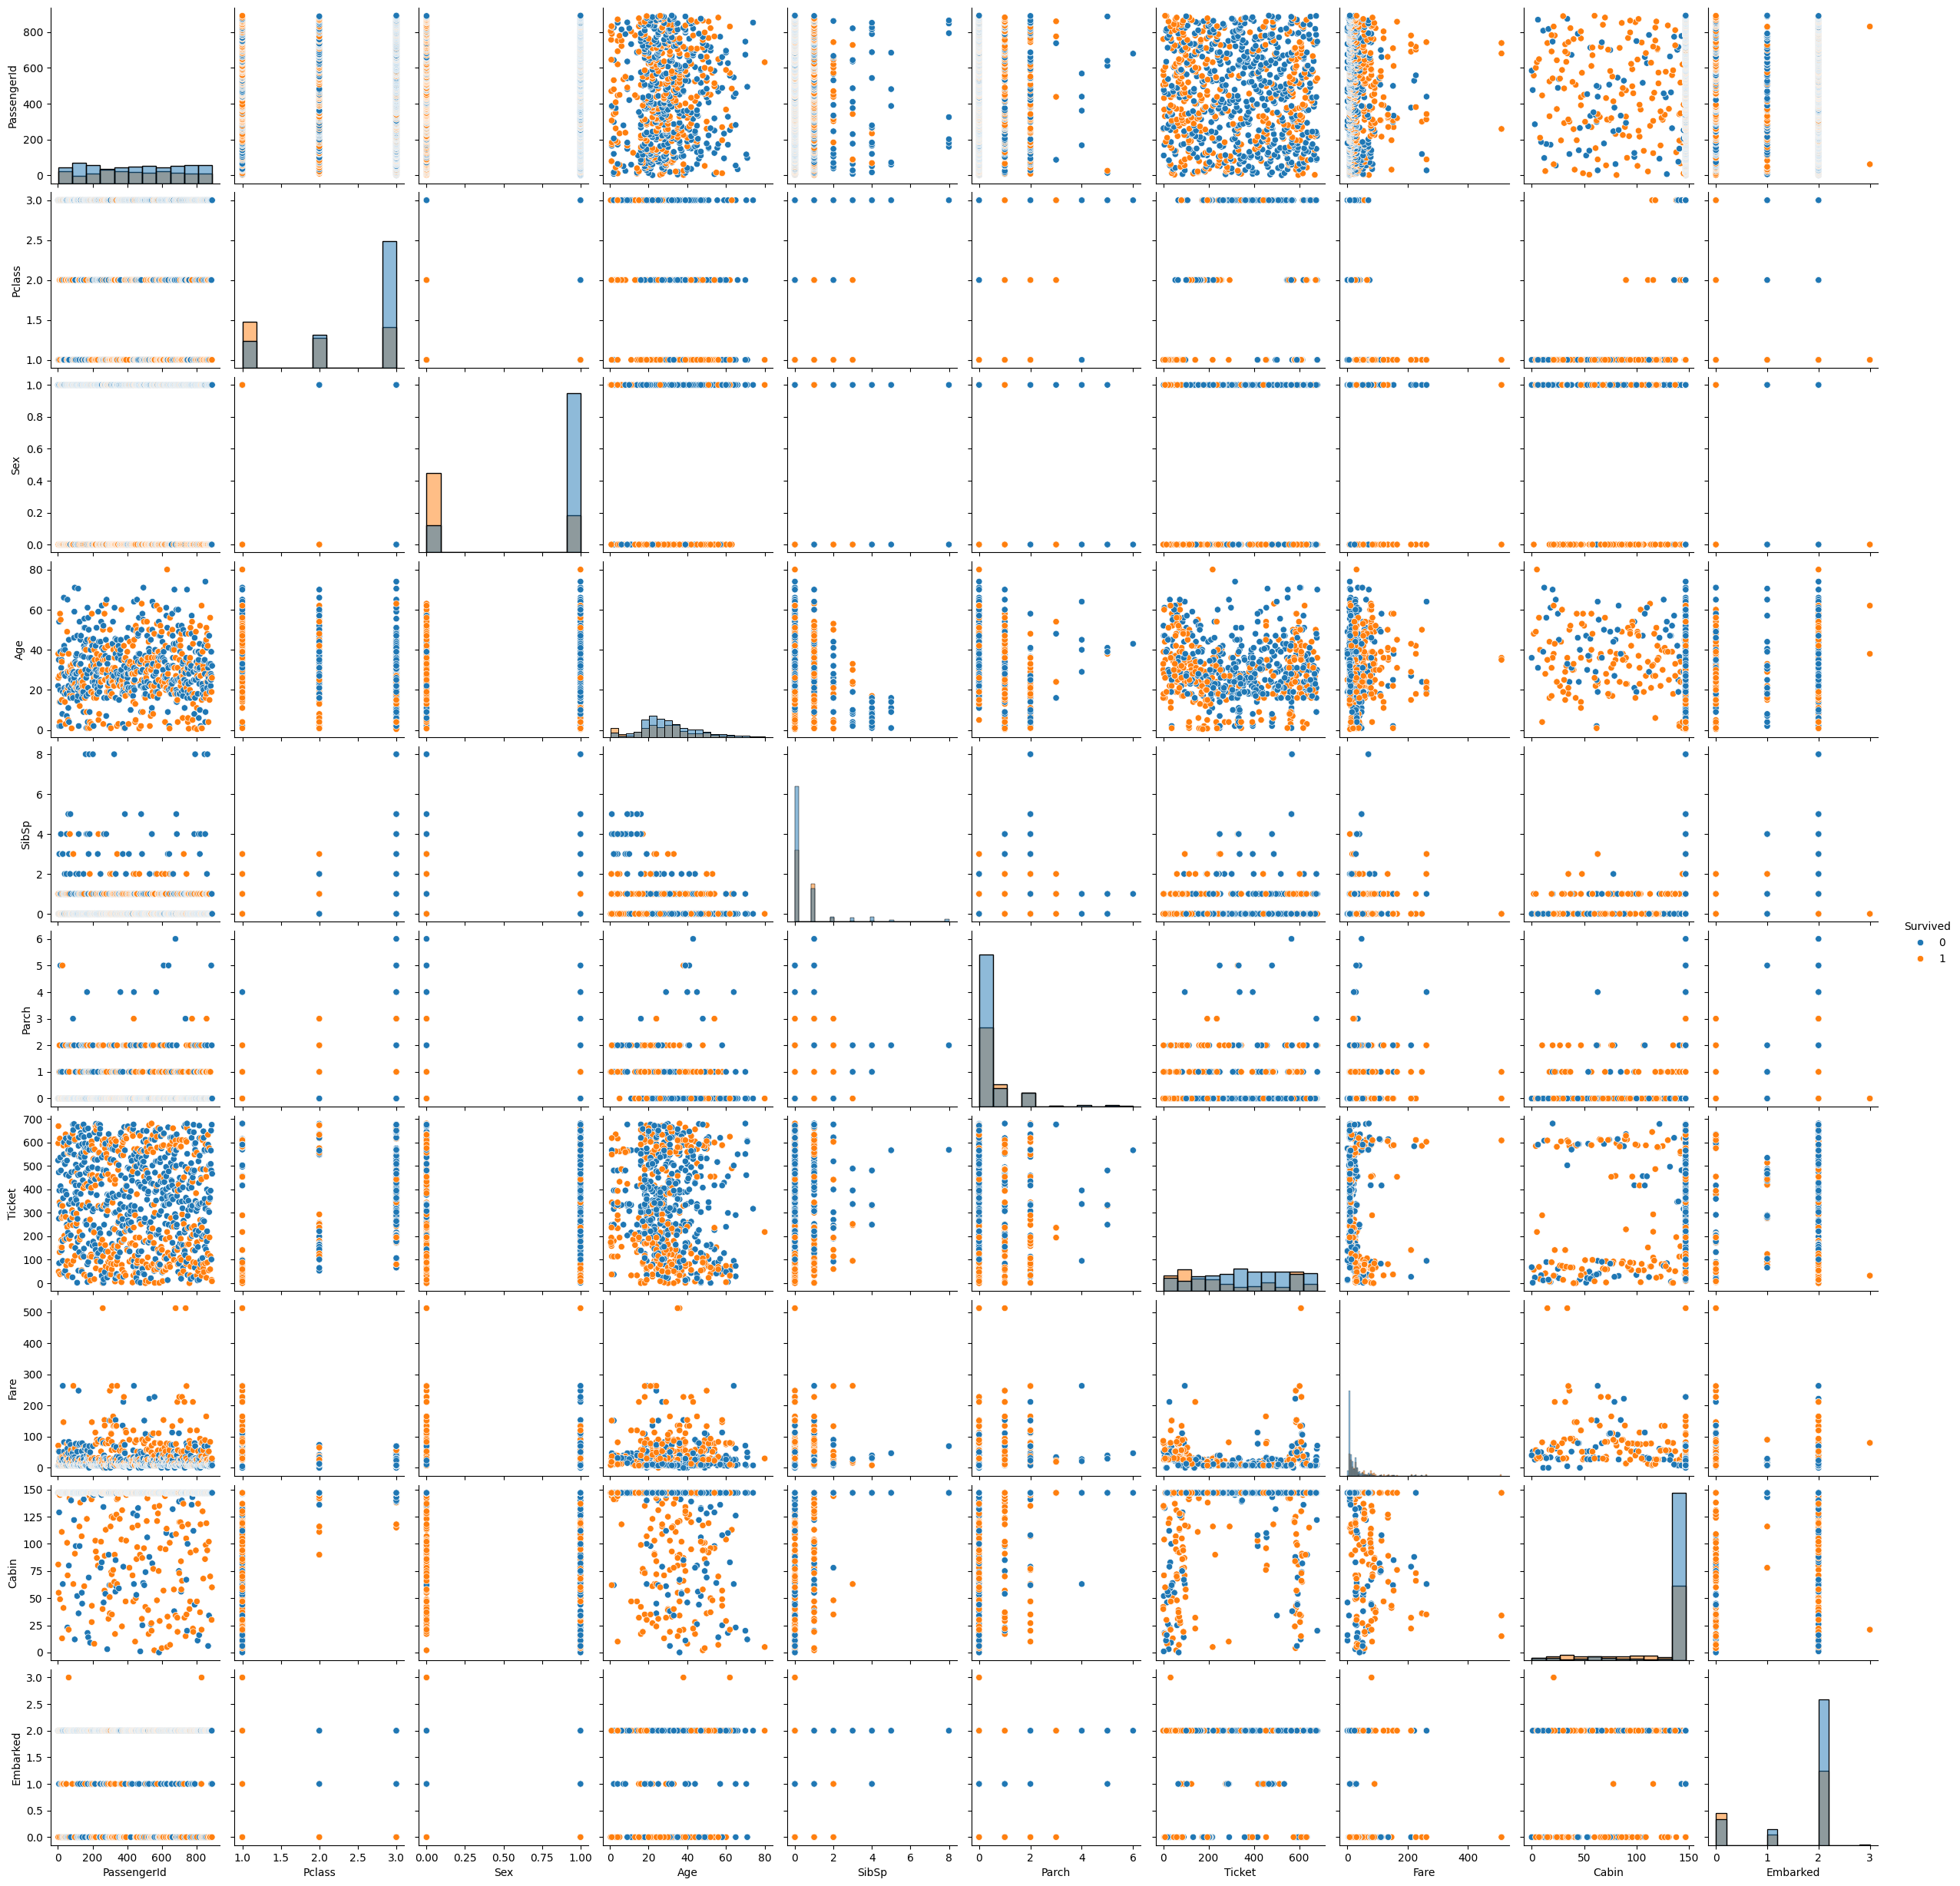

In [ ]:
sns.pairplot(df, hue = "Survived" , diag_kind = "hist")

In [ ]:
features_e = ["Pclass", "Sex" , "Embarked"]

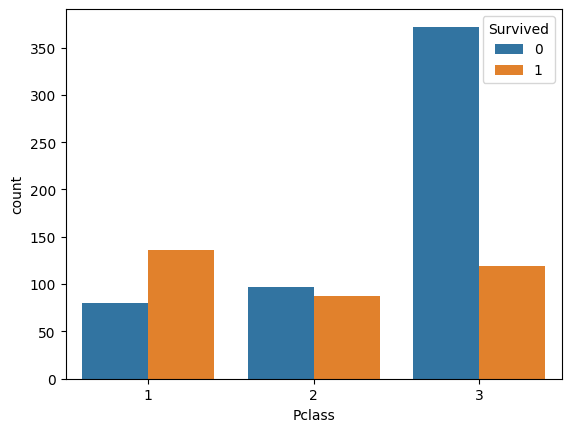

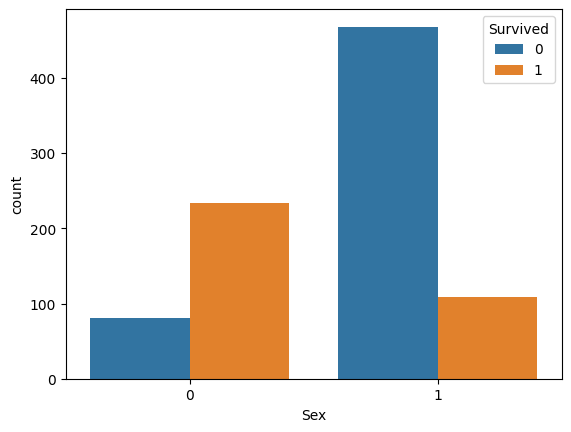

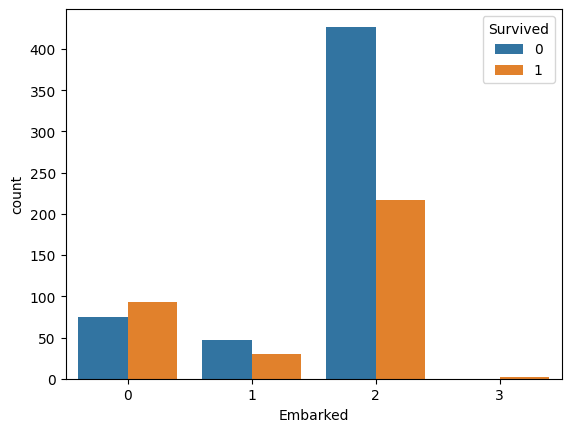

In [ ]:
for feature in features_e:
    sns.countplot(x = feature, hue = "Survived", data = df)
    plt.show()

In [ ]:
df = df.drop(["PassengerId", "Ticket", "Cabin"], axis = 1)

In [ ]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = "median")

In [ ]:
df["Age"] = imputer.fit_transform(df[["Age"]])

In [ ]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [ ]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [ ]:
X = df.iloc[:,1:]

In [ ]:
X.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [ ]:
y = df.iloc[:,0]

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier()

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cv_scores = cross_val_score(dt,X,y, cv = 5)

In [ ]:
cv_scores

array([0.73743017, 0.7752809 , 0.79775281, 0.74719101, 0.82022472])

In [ ]:
import numpy as np

In [ ]:
np.mean(cv_scores)

0.7755759211600025

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()

In [ ]:
cv_scores2 = cross_val_score(dt,X,y, cv = 5)

In [ ]:
np.mean(cv_scores2)

0.7800389178331555

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [ ]:
dt_final = DecisionTreeClassifier()

In [ ]:
dt_final.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [ ]:
preds = dt_final.predict(xtest)

In [ ]:
lr_final = LogisticRegression()

In [ ]:
lr_final.fit(xtrain,ytrain)
preds_lr = lr_final.predict(xtest)

In [ ]:
df["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
accuracy_score(ytest,preds), accuracy_score(ytest,preds_lr)

(0.7354260089686099, 0.8071748878923767)

In [ ]:
confusion_matrix(ytest,preds_lr)

array([[115,  19],
       [ 24,  65]], dtype=int64)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(ytest,preds))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78       134
           1       0.67      0.66      0.67        89

    accuracy                           0.74       223
   macro avg       0.72      0.72      0.72       223
weighted avg       0.73      0.74      0.74       223



In [ ]:
print(classification_report(ytest,preds_lr))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       134
           1       0.77      0.73      0.75        89

    accuracy                           0.81       223
   macro avg       0.80      0.79      0.80       223
weighted avg       0.81      0.81      0.81       223

